First few rows of the dataset:
     sepal_length  sepal_width  petal_length  petal_width     species
102           7.1          3.0           5.9          2.1   virginica
53            5.5          2.3           4.0          1.3  versicolor
116           6.5          3.0           5.5          1.8   virginica
27            5.2          3.5           1.5          0.2      setosa
24            4.8          3.4           1.9          0.2      setosa


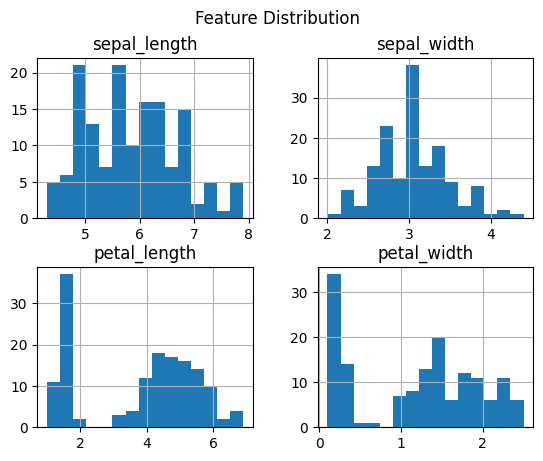

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Predicted Species: versicolor


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
data = pd.read_csv(url)


# Separate features and target
X = data.drop('species', axis=1)
y = data['species']

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.sample(5))

# Plot histograms of the features
X.hist(bins=15, layout=(2,2))
plt.suptitle("Feature Distribution")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=y.unique()))

# Example: Classify a sample with specific feature values
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
predicted_species = lda.predict(sample)
print(f"Predicted Species: {predicted_species[0]}")


Linear Discriminant Analysis (LDA) is used for this purpose because it’s a powerful tool for **classification** tasks, especially when there are multiple classes to distinguish between, as in the Iris dataset, which contains three flower species: *Setosa*, *Versicolor*, and *Virginica*. Here’s why and how LDA is applied to this problem and how it directly relates to the problem statement.

### Why LDA is Suitable for This Task

1. **Multiclass Classification**:
   The problem statement requires us to classify a flower based on its measurements (sepal and petal lengths and widths) and determine its species. LDA is a well-suited algorithm for this because it’s specifically designed to **maximize the separability between multiple classes**. It achieves this by finding linear combinations of the input features that result in the best class separation.

2. **Dimensionality Reduction**:
   While LDA is primarily used for classification, it also has dimensionality reduction capabilities, which helps in simplifying complex data. For example, even though the Iris dataset has four features, LDA can reduce this to a lower-dimensional space while still maximizing the variance between classes. This dimensionality reduction can make the problem simpler and easier to visualize without compromising class separability.

3. **Class Separability**:
   LDA’s objective is to model the differences between classes by maximizing the distance between class means while minimizing the variance within each class. By projecting the data into a new space where the classes are most separable, LDA enables effective and interpretable classification, which is essential when the goal is to determine which species a given flower belongs to.

### How LDA is Applied to Classify Species in the Iris Dataset

1. **Preparing the Data**:
   - First, the Iris dataset is split into features (X) and target (y). Here, the features are the flower measurements (sepal length, sepal width, petal length, petal width), and the target is the species.
   - The data is then split into training and testing sets, allowing the model to learn from one part of the data (training set) and be evaluated on unseen data (testing set).

2. **Standardizing the Features**:
   - Standardization is applied to ensure all features contribute equally to the model, as LDA is sensitive to the scale of the data. This step ensures that features with larger ranges don’t disproportionately influence the model.

3. **Training the LDA Model**:
   - LDA is fitted to the training data. During training, LDA calculates the **mean and variance** for each class and projects the data onto a new axis (or multiple axes, depending on the number of classes and features) that maximizes the distance between class means. This process creates a linear combination of the features that best separates the classes.

4. **Making Predictions**:
   - Once trained, the LDA model is used to classify the species of new data points (flowers). For each sample in the test set, LDA predicts the most likely class (species) by assessing where it falls along the new axis of maximum separability.

5. **Evaluating the Model**:
   - The model’s performance is evaluated using metrics such as accuracy, the confusion matrix, and the classification report. These metrics indicate how well the LDA model can differentiate between the three species based on the measurements.

### How LDA Relates to the Problem Statement

The problem statement requires us to determine the species of a flower based on its measurements. LDA directly addresses this by:
- **Finding a linear combination of features that maximizes the separation** between the species, allowing it to distinguish between them effectively.
- **Projecting the data into a lower-dimensional space** where classification boundaries between the species are more distinct, making it easier to classify new flowers accurately.

By learning from labeled examples (flowers with known species), LDA becomes capable of classifying new flowers into the correct species, which is the central goal of this task. In essence, LDA uses statistical properties of the data to make reliable predictions, offering a systematic approach to classifying species based on feature measurements.

### Detailed Explanation of the Code:

#### 1. **Loading the Dataset**:
The first step is to load the Iris dataset, which contains information about different types of flowers (species) and their measurements (sepal length, sepal width, petal length, petal width). The dataset is loaded from a URL into a pandas DataFrame. The column `Id` is dropped because it does not contain useful information for the classification task.

#### 2. **Separating Features and Target**:
The dataset is divided into two parts:
- **Features (X)**: The input data that will be used to make predictions. These are the measurements (sepal length, sepal width, petal length, and petal width) of each flower.
- **Target (y)**: The output data that represents the species of each flower. This column is used for training the model to learn how to predict the species based on the features.

#### 3. **Visualizing Feature Distributions**:
Before applying any machine learning models, it's helpful to visualize the data. Histograms are plotted for each of the features to show how their values are distributed. This gives us a sense of how the data looks and helps in understanding the range and spread of each feature. For instance, it may show if one feature is skewed or has outliers, which could affect the model’s performance.

#### 4. **Splitting the Data**:
The dataset is split into two parts: a **training set** (used to train the model) and a **testing set** (used to evaluate the model). A common split is 70% for training and 30% for testing. This ensures that the model has data to learn from while also leaving some unseen data to test its performance.

#### 5. **Standardizing the Features**:
Standardization of the features ensures that all input features (sepal and petal measurements) are on the same scale. This is important because machine learning algorithms, like Linear Discriminant Analysis (LDA), perform better when the features are scaled similarly. Standardization transforms each feature to have a mean of 0 and a standard deviation of 1, ensuring that no single feature dominates due to its larger scale.

#### 6. **Training the LDA Model**:
The Linear Discriminant Analysis (LDA) model is used for classification. LDA works by finding linear combinations of the input features that best separate the classes (in this case, the species of flowers). The model is trained using the **training data**, where it learns the relationship between the features (X) and the target (y). The model tries to find patterns that can differentiate the species based on the provided measurements.

#### 7. **Making Predictions**:
Once the model is trained, it is used to make predictions on the **testing set** (data that the model has never seen before). These predictions are compared to the actual species labels (y_test) to evaluate the model's performance.

#### 8. **Evaluating the Model**:
Several evaluation metrics are used to assess the performance of the model:
- **Accuracy**: The percentage of correct predictions out of all predictions. It gives a general idea of how well the model is performing.
- **Confusion Matrix**: This matrix shows how well the model's predictions match the actual labels. It helps identify which species were predicted correctly and which were misclassified. Each row represents the actual class, and each column represents the predicted class.
- **Classification Report**: This report provides a more detailed evaluation, including precision, recall, and F1 score for each species. 
  - **Precision** measures how many of the predicted instances for a species were actually correct.
  - **Recall** measures how many of the actual instances for a species were correctly predicted.
  - **F1 Score** is the harmonic mean of precision and recall, providing a single metric that balances both.

#### 9. **Classifying a New Sample**:
Once the model is trained and evaluated, it can be used to predict the species of new, unseen samples. A new sample with specific feature values (sepal length, sepal width, petal length, and petal width) is created. The model then predicts the species of the new sample based on the learned patterns.

---

### Why Each Step is Important:

1. **Loading and Preparing Data**: Understanding and preparing the data correctly is the foundation of any machine learning model. It’s essential to remove irrelevant columns, separate features from the target, and inspect the data for any obvious issues.

2. **Visualization**: By visualizing the data, we can detect patterns, relationships, or issues (like imbalanced data or outliers) that might need to be addressed before training the model.

3. **Data Splitting**: The training and testing split ensures that the model can generalize well to new, unseen data. Without splitting the data, the model would just memorize the data it was trained on, leading to poor performance on new data.

4. **Standardization**: Standardizing the features ensures that all the input features contribute equally to the model, preventing any feature with a larger range from dominating the learning process.

5. **Model Training**: Training the model with the data allows it to learn the relationship between the features and the target, enabling it to make predictions on unseen data.

6. **Evaluation**: Evaluating the model using multiple metrics ensures that we understand not only how accurate it is, but also how well it is performing in distinguishing between the species and if it is biased towards certain species.

7. **Prediction**: Finally, the ability to predict the species of new flower samples allows the model to be applied to real-world scenarios.

---

In summary, this process demonstrates how to apply the Linear Discriminant Analysis (LDA) algorithm to classify flowers into species based on their features, evaluate the model’s performance, and use it to predict the species of new data.